# Lab | Data Aggregation and Filtering

In this challenge, we will continue to work with customer data from an insurance company. We will use the dataset called marketing_customer_analysis.csv, which can be found at the following link:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/marketing_customer_analysis.csv

This dataset contains information such as customer demographics, policy details, vehicle information, and the customer's response to the last marketing campaign. Our goal is to explore and analyze this data by first performing data cleaning, formatting, and structuring.

In [1]:
import pandas as pd
import numpy as np
import data_cleaning_function as dc
data = pd.read_csv('https://raw.githubusercontent.com/data-bootcamp-v4/data/main/marketing_customer_analysis.csv')

In [2]:
data.head()

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [3]:
#checking the column names if there are any uppercase latters or wider spaces.
#checking if there are any missing values! 
#There are missing values for State, CLV, Months Since Last Claim, Number of Open Complaints, 
#Vehicle Class and Vehicle Size with a percentage of ~5,8% related to the total amount of rows.
data.isna().sum()/data.shape[0]*100

Unnamed: 0                        0.000000
Customer                          0.000000
State                             5.783685
Customer Lifetime Value           0.000000
Response                          5.783685
Coverage                          0.000000
Education                         0.000000
Effective To Date                 0.000000
EmploymentStatus                  0.000000
Gender                            0.000000
Income                            0.000000
Location Code                     0.000000
Marital Status                    0.000000
Monthly Premium Auto              0.000000
Months Since Last Claim           5.802016
Months Since Policy Inception     0.000000
Number of Open Complaints         5.802016
Number of Policies                0.000000
Policy Type                       0.000000
Policy                            0.000000
Renew Offer Type                  0.000000
Sales Channel                     0.000000
Total Claim Amount                0.000000
Vehicle Cla

In [4]:
#dropping the Unnamed: 0 column which comes from resetting the index
data = dc.dropping_column(data,'Unnamed: 0')
#rename the columns with lowercase letters and without wider spaces.
data = dc.replace_column_lower(data,' ','_')

In [5]:
#replacing the empty values of the categorical columns with the mode and of the numerical columns with the median.
data = dc.fill_na(data,'state','mode')
data = dc.fill_na(data,'response','mode')
data = dc.fill_na(data,'months_since_last_claim','median')
data = dc.fill_na(data,'number_of_open_complaints','median')
data = dc.fill_na(data,'vehicle_class','mode')
data = dc.fill_na(data,'vehicle_type','mode')
data = dc.fill_na(data,'vehicle_size','mode')

In [6]:
#checking again for missing values
data.isna().sum()/data.shape[0]*100

customer                         0.0
state                            0.0
customer_lifetime_value          0.0
response                         0.0
coverage                         0.0
education                        0.0
effective_to_date                0.0
employmentstatus                 0.0
gender                           0.0
income                           0.0
location_code                    0.0
marital_status                   0.0
monthly_premium_auto             0.0
months_since_last_claim          0.0
months_since_policy_inception    0.0
number_of_open_complaints        0.0
number_of_policies               0.0
policy_type                      0.0
policy                           0.0
renew_offer_type                 0.0
sales_channel                    0.0
total_claim_amount               0.0
vehicle_class                    0.0
vehicle_size                     0.0
vehicle_type                     0.0
dtype: float64

In [7]:
#checking the datatypes of each column to see if I have to chance it.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       10910 non-null  object 
 1   state                          10910 non-null  object 
 2   customer_lifetime_value        10910 non-null  float64
 3   response                       10910 non-null  object 
 4   coverage                       10910 non-null  object 
 5   education                      10910 non-null  object 
 6   effective_to_date              10910 non-null  object 
 7   employmentstatus               10910 non-null  object 
 8   gender                         10910 non-null  object 
 9   income                         10910 non-null  int64  
 10  location_code                  10910 non-null  object 
 11  marital_status                 10910 non-null  object 
 12  monthly_premium_auto           10910 non-null 

In [8]:
#modify months__since__last__claim -> int
#and number__of__open__complaints -> int
#effective_to_date -> datetime
data = dc.chance_datatype(data,'months_since_last_claim',int)
data = dc.chance_datatype(data,'number_of_open_complaints',int)
data = dc.chance_object_to_datetime(data,'effective_to_date')
#checking again
#data.info()

C:\Users\schue\IronHack\Bootcamp\Week_1\Day_4\Afternoon\lab-customer-analysis-round-3\data_cleaning_function.py:101: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')


In [9]:
#display all unique values of every categrical column to see of there are typos or 
#different words for the same meaning like 'F' 'f' 'female'.
for col in data.select_dtypes(object):   
    display(col,data[col].unique())

'customer'

array(['DK49336', 'KX64629', 'LZ68649', ..., 'KX53892', 'TL39050',
       'WA60547'], dtype=object)

'state'

array(['Arizona', 'California', 'Washington', 'Oregon', 'Nevada'],
      dtype=object)

'response'

array(['No', 'Yes'], dtype=object)

'coverage'

array(['Basic', 'Extended', 'Premium'], dtype=object)

'education'

array(['College', 'Bachelor', 'High School or Below', 'Doctor', 'Master'],
      dtype=object)

'employmentstatus'

array(['Employed', 'Unemployed', 'Medical Leave', 'Disabled', 'Retired'],
      dtype=object)

'gender'

array(['M', 'F'], dtype=object)

'location_code'

array(['Suburban', 'Urban', 'Rural'], dtype=object)

'marital_status'

array(['Married', 'Single', 'Divorced'], dtype=object)

'policy_type'

array(['Corporate Auto', 'Personal Auto', 'Special Auto'], dtype=object)

'policy'

array(['Corporate L3', 'Personal L3', 'Personal L2', 'Corporate L2',
       'Personal L1', 'Special L1', 'Corporate L1', 'Special L3',
       'Special L2'], dtype=object)

'renew_offer_type'

array(['Offer3', 'Offer4', 'Offer2', 'Offer1'], dtype=object)

'sales_channel'

array(['Agent', 'Call Center', 'Branch', 'Web'], dtype=object)

'vehicle_class'

array(['Four-Door Car', 'SUV', 'Two-Door Car', 'Sports Car', 'Luxury Car',
       'Luxury SUV'], dtype=object)

'vehicle_size'

array(['Medsize', 'Small', 'Large'], dtype=object)

'vehicle_type'

array(['A'], dtype=object)

In [10]:
#I group the type of vehicle class for 'Sports Car', 'Luxury Car','Luxury SUV' to 'Luxury' as in the LAB before. 
data = dc.replace(data,'vehicle_class','Sports Car','Luxury')
data = dc.replace(data,'vehicle_class','Luxury SUV','Luxury')
data = dc.replace(data,'vehicle_class','Luxury Car','Luxury')
data['vehicle_class'].unique()

array(['Four-Door Car', 'SUV', 'Two-Door Car', 'Luxury'], dtype=object)

In [11]:
#with the describefunction i will check if there are values = 0.
display(data.describe().T)
#to know how many rows are equal 0 i use the .index
display(data[data['income']==0].index)
#i can see there are 2787 rows which are income =0
#one possible way can be to drop these rows as outliers, because they will bias the result of some insights
#a better way would be to make a group "customers with zero income" und investigate them alone
#at this point i descide to dont drop them.

,count,mean,min,25%,50%,75%,max,std
customer_lifetime_value,10910.0,8018.241094,1898.007675,4014.453113,5771.147235,8992.779137,83325.38119,6885.081434
effective_to_date,10910,2011-01-29 22:50:02.749771008,2011-01-01 00:00:00,2011-01-16 00:00:00,2011-01-30 00:00:00,2011-02-14 00:00:00,2011-02-28 00:00:00,NaN
income,10910.0,37536.284785,0.0,0.0,33813.5,62250.75,99981.0,30359.19567
monthly_premium_auto,10910.0,93.196059,61.0,68.0,83.0,109.0,298.0,34.442532
months_since_last_claim,10910.0,15.082401,0.0,7.0,14.0,23.0,35.0,9.787208
months_since_policy_inception,10910.0,48.091934,0.0,24.0,48.0,71.0,99.0,27.940675
number_of_open_complaints,10910.0,0.361962,0.0,0.0,0.0,0.0,5.0,0.890134
number_of_policies,10910.0,2.979193,1.0,1.0,2.0,4.0,9.0,2.399359
total_claim_amount,10910.0,434.88833,0.099007,271.082527,382.56463,547.2,2893.239678,292.180556


Index([    1,    14,    17,    20,    24,    30,    35,    39,    46,    53,
       ...
       10868, 10874, 10878, 10884, 10885, 10899, 10900, 10904, 10905, 10909],
      dtype='int64', length=2787)

In [12]:
data[data['income']==0]

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,A
14,TL59568,Arizona,12836.009510,No,Premium,High School or Below,2011-02-28,Unemployed,M,0,...,0,2,Personal Auto,Personal L2,Offer3,Agent,835.200000,Two-Door Car,Medsize,A
17,TR26615,Oregon,2497.531509,No,Basic,High School or Below,2011-01-17,Unemployed,M,0,...,0,1,Corporate Auto,Corporate L2,Offer2,Branch,272.381465,Two-Door Car,Medsize,A
20,OM80593,California,7247.313475,No,Basic,Bachelor,2011-02-23,Unemployed,F,0,...,0,7,Personal Auto,Personal L3,Offer1,Call Center,499.200000,SUV,Medsize,A
24,YK32760,Oregon,2502.209885,No,Basic,High School or Below,2011-02-15,Unemployed,M,0,...,1,1,Corporate Auto,Corporate L1,Offer1,Agent,355.200000,Four-Door Car,Medsize,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10899,WU60905,California,8610.667489,No,Basic,High School or Below,2011-02-06,Unemployed,F,0,...,0,9,Corporate Auto,Corporate L1,Offer3,Web,532.800000,SUV,Medsize,A
10900,VN73653,Oregon,6423.739052,No,Basic,College,2011-02-13,Unemployed,M,0,...,0,1,Corporate Auto,Corporate L2,Offer3,Agent,1621.560425,Luxury,Medsize,A
10904,QI63521,Nevada,19228.463620,No,Basic,High School or Below,2011-02-24,Unemployed,M,0,...,0,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury,Medsize,A
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,0,...,0,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury,Medsize,A


1. Create a new DataFrame that only includes customers who have a total_claim_amount greater than $1,000 and have a response of "Yes" to the last marketing campaign.

In [13]:
new_data = data[(data['total_claim_amount']>1000) & (data['response'] == 'Yes')]
new_data

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
189,OK31456,California,11009.130490,Yes,Premium,Bachelor,2011-01-24,Employed,F,51643,...,0,1,Corporate Auto,Corporate L3,Offer2,Agent,1358.400000,Luxury,Medsize,A
236,YJ16163,Oregon,11009.130490,Yes,Premium,Bachelor,2011-01-24,Employed,F,51643,...,0,1,Special Auto,Special L3,Offer2,Agent,1358.400000,Luxury,Medsize,A
419,GW43195,Oregon,25807.063000,Yes,Extended,College,2011-02-13,Employed,F,71210,...,1,2,Personal Auto,Personal L2,Offer1,Branch,1027.200000,Luxury,Small,A
442,IP94270,Arizona,13736.132500,Yes,Premium,Master,2011-02-13,Disabled,F,16181,...,0,8,Personal Auto,Personal L2,Offer1,Web,1261.319869,SUV,Medsize,A
587,FJ28407,California,5619.689084,Yes,Premium,High School or Below,2011-01-26,Unemployed,M,0,...,0,1,Personal Auto,Personal L1,Offer2,Web,1027.000029,SUV,Medsize,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10351,FN44127,Oregon,3508.569533,Yes,Extended,College,2011-01-05,Medical Leave,M,20978,...,1,1,Personal Auto,Personal L2,Offer2,Branch,1176.278800,Four-Door Car,Small,A
10373,XZ64172,Oregon,10963.957230,Yes,Premium,High School or Below,2011-02-08,Employed,M,55687,...,0,1,Corporate Auto,Corporate L2,Offer1,Agent,1324.800000,Luxury,Medsize,A
10487,IX60941,Oregon,3508.569533,Yes,Extended,College,2011-01-05,Medical Leave,M,20978,...,1,1,Personal Auto,Personal L3,Offer2,Branch,1176.278800,Four-Door Car,Small,A
10565,QO62792,Oregon,7840.165778,Yes,Extended,College,2011-01-14,Employed,M,58414,...,2,1,Personal Auto,Personal L3,Offer2,Agent,1008.000000,Four-Door Car,Medsize,A


2. Using the original Dataframe, analyze the average total_claim_amount by each policy type and gender for customers who have responded "Yes" to the last marketing campaign. Write your conclusions.

In [14]:
#The policy type with the highest total claims is type 'Special Auto' folowed by 'Personal Auto' and then 'Corporate Auto'.
#In the group of 'Personal Autos' there are slightly more men with a claim. In both other groups there are more women with a claim.
pd.pivot_table(data[data['response'] == 'Yes'], index=['policy_type','gender'], values=['total_claim_amount'], aggfunc='mean').sort_values(['policy_type','total_claim_amount'], ascending=False).round(2)

total_claim_amount
policy_type    gender                    
Special Auto   F                   453.28
               M                   429.53
Personal Auto  M                   457.01
               F                   452.97
Corporate Auto F                   433.74
               M                   408.58

3. Analyze the total number of customers who have policies in each state, and then filter the results to only include states where there are more than 500 customers.

In [15]:
data_amount_customer_by_state = pd.pivot_table(data, index=['state'], values=['customer'],aggfunc='count')
display(data_amount_customer_by_state)

,customer
state,
Arizona,1937
California,4183
Nevada,993
Oregon,2909
Washington,888


In [16]:
data_amount_customer_by_state[data_amount_customer_by_state['customer']>500]

,customer
state,
Arizona,1937
California,4183
Nevada,993
Oregon,2909
Washington,888


4. Find the maximum, minimum, and median customer lifetime value by education level and gender. Write your conclusions.

In [17]:
data_education_gender = pd.pivot_table(data, index=['education','gender'], values=['customer_lifetime_value'], aggfunc=[max,min,np.median])
data_education_gender

max                     min  \
                            customer_lifetime_value customer_lifetime_value   
education            gender                                                   
Bachelor             F                  73225.95652             1904.000852   
                     M                  67907.27050             1898.007675   
College              F                  61850.18803             1898.683686   
                     M                  61134.68307             1918.119700   
Doctor               F                  44856.11397             2395.570000   
                     M                  32677.34284             2267.604038   
High School or Below F                  55277.44589             2144.921535   
                     M                  83325.38119             1940.981221   
Master               F                  51016.06704             2417.777032   
                     M                  50568.25912             2272.307310   

                                             median  
                            customer_lifetime_value  
education            gender                          
Bachelor             F                  5640.505303  
                     M                  5548.031892  
College              F                  5623.611187  
                     M                  6005.847375  
Doctor               F                  5332.462694  
                     M                  5577.669457  
High School or Below F                  6039.553187  
                     M                  6286.731006  
Master               F                  5729.855012  
                     M                  5579.099207

In [18]:
#For every Education Level we see CLV's sorted by the median CSV in descending Order.
data_education_gender.columns = ['max_customer_lifetime_value','min_customer_lifetime_value','median_customer_lifetime_value']
data_education_gender.sort_values(['education','median_customer_lifetime_value'], ascending= False)

max_customer_lifetime_value  \
education            gender                                
Master               F                       51016.06704   
                     M                       50568.25912   
High School or Below M                       83325.38119   
                     F                       55277.44589   
Doctor               M                       32677.34284   
                     F                       44856.11397   
College              M                       61134.68307   
                     F                       61850.18803   
Bachelor             F                       73225.95652   
                     M                       67907.27050   

                             min_customer_lifetime_value  \
education            gender                                
Master               F                       2417.777032   
                     M                       2272.307310   
High School or Below M                       1940.981221   
                     F                       2144.921535   
Doctor               M                       2267.604038   
                     F                       2395.570000   
College              M                       1918.119700   
                     F                       1898.683686   
Bachelor             F                       1904.000852   
                     M                       1898.007675   

                             median_customer_lifetime_value  
education            gender                                  
Master               F                          5729.855012  
                     M                          5579.099207  
High School or Below M                          6286.731006  
                     F                          6039.553187  
Doctor               M                          5577.669457  
                     F                          5332.462694  
College              M                          6005.847375  
                     F                          5623.611187  
Bachelor             F                          5640.505303  
                     M                          5548.031892

## Bonus

5. The marketing team wants to analyze the number of policies sold by state and month. Present the data in a table where the months are arranged as columns and the states are arranged as rows.

In [19]:
#extracting the month from the 'effective_to_date' column to a new column named 'month'
data['month'] = data['effective_to_date'].apply(lambda d: d.strftime(format="%B"))

In [20]:
#creating a pivot table with 'month', 'state' as groups and the amount of number of policies as values.
# the months are the first group because i will later present the months as columns
data_policies_by_month_and_states = pd.pivot_table(data, index=['month','state'], values='number_of_policies', aggfunc='count').reset_index()
data_policies_by_month_and_states

,month,state,number_of_policies
0,February,Arizona,929
1,February,California,1952
2,February,Nevada,442
3,February,Oregon,1344
4,February,Washington,425
5,January,Arizona,1008
6,January,California,2231
7,January,Nevada,551
8,January,Oregon,1565
9,January,Washington,463


In [21]:
data_policies_by_month_and_states = pd.pivot(data_policies_by_month_and_states, index='state', columns='month', values='number_of_policies')
data_policies_by_month_and_states

month,February,January
state,,
Arizona,929,1008
California,1952,2231
Nevada,442,551
Oregon,1344,1565
Washington,425,463


6.  Display a new DataFrame that contains the number of policies sold by month, by state, for the top 3 states with the highest number of policies sold.

*Hint:*
- *To accomplish this, you will first need to group the data by state and month, then count the number of policies sold for each group. Afterwards, you will need to sort the data by the count of policies sold in descending order.*
- *Next, you will select the top 3 states with the highest number of policies sold.*
- *Finally, you will create a new DataFrame that contains the number of policies sold by month for each of the top 3 states.*

In [22]:
#to find out the first 3 states with the highest number of policies (not per mounth) i group by state and agg the count of number of policies and sort them in descending order.
# the first states are California, Oregon and Arizona.
pd.pivot_table(data, index=['state'], values='number_of_policies', aggfunc='count').sort_values('number_of_policies', ascending=False)

,number_of_policies
state,
California,4183
Oregon,2909
Arizona,1937
Nevada,993
Washington,888


In [23]:
#filter by the first 3 states.
#sorted by month and number of policies in descending order
pd.pivot_table(data[data['state'].isin(['California','Oregon','Arizona'])], index=['month','state'], values='number_of_policies', aggfunc='count').sort_values(['month','number_of_policies'], ascending=False)

number_of_policies
month    state                         
January  California                2231
         Oregon                    1565
         Arizona                   1008
February California                1952
         Oregon                    1344
         Arizona                    929

7. The marketing team wants to analyze the effect of different marketing channels on the customer response rate.

Hint: You can use melt to unpivot the data and create a table that shows the customer response rate (those who responded "Yes") by marketing channel.

In [24]:
data_channel_response_all = pd.pivot_table(data, index='sales_channel', values='response', aggfunc='count')
data_channel_response_yes = pd.pivot_table(data[data['response'] == 'Yes'], index='sales_channel', values='response', aggfunc='count')
display(data_channel_response_all)
display(data_channel_response_yes)

,response
sales_channel,
Agent,4121
Branch,3022
Call Center,2141
Web,1626


,response
sales_channel,
Agent,742
Branch,326
Call Center,221
Web,177


In [25]:
data_channel_response_all['response_ratio']=data_channel_response_yes['response']/data_channel_response_all['response']*100.
display(data_channel_response_all.round(2))

,response,response_ratio
sales_channel,,
Agent,4121,18.01
Branch,3022,10.79
Call Center,2141,10.32
Web,1626,10.89


In [26]:
#pd.melt(data_channel_response, id_vars='sales_channel', value_vars='response', value_name='test')

External Resources for Data Filtering: https://towardsdatascience.com/filtering-data-frames-in-pandas-b570b1f834b9

## EDA (Exploratory Data Analysis) - Complete the following tasks to explore the data:

Show DataFrame info.

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       10910 non-null  object        
 1   state                          10910 non-null  object        
 2   customer_lifetime_value        10910 non-null  float64       
 3   response                       10910 non-null  object        
 4   coverage                       10910 non-null  object        
 5   education                      10910 non-null  object        
 6   effective_to_date              10910 non-null  datetime64[ns]
 7   employmentstatus               10910 non-null  object        
 8   gender                         10910 non-null  object        
 9   income                         10910 non-null  int64         
 10  location_code                  10910 non-null  object        
 11  marital_status 

Describe DataFrame.

In [28]:
data.describe()

,customer_lifetime_value,effective_to_date,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,10910.000000,10910,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000
mean,8018.241094,2011-01-29 22:50:02.749771008,37536.284785,93.196059,15.082401,48.091934,0.361962,2.979193,434.888330
min,1898.007675,2011-01-01 00:00:00,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,4014.453113,2011-01-16 00:00:00,0.000000,68.000000,7.000000,24.000000,0.000000,1.000000,271.082527
50%,5771.147235,2011-01-30 00:00:00,33813.500000,83.000000,14.000000,48.000000,0.000000,2.000000,382.564630
75%,8992.779137,2011-02-14 00:00:00,62250.750000,109.000000,23.000000,71.000000,0.000000,4.000000,547.200000
max,83325.381190,2011-02-28 00:00:00,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678
std,6885.081434,NaN,30359.195670,34.442532,9.787208,27.940675,0.890134,2.399359,292.180556


Show a plot of the total number of responses.

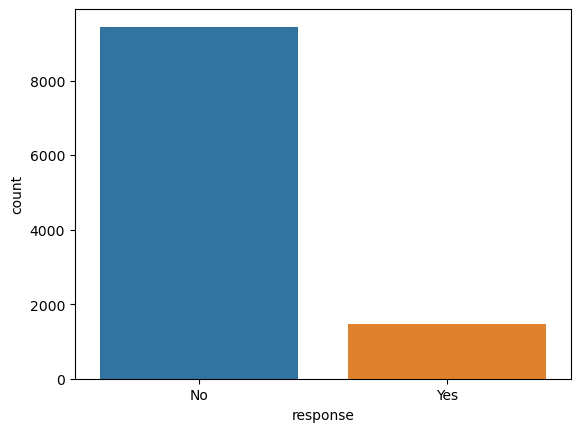

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax= plt.subplots()
sns.countplot(data=data,x='response')
plt.show()

Show a plot of the response rate by the sales channel.

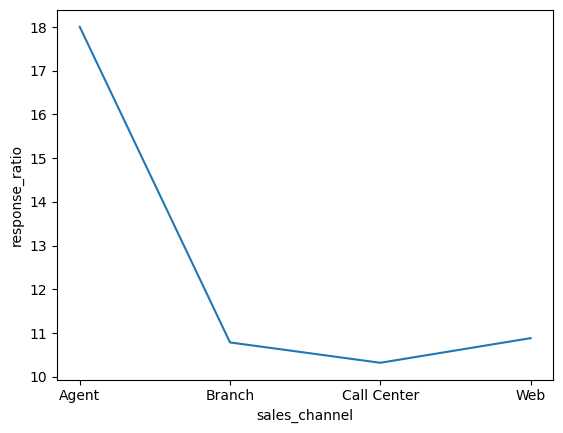

In [30]:
fig, ax= plt.subplots()
sns.lineplot(data=data_channel_response_all,x='sales_channel', y='response_ratio')
plt.show()

Show a plot of the response rate by the total claim amount.

In [31]:
data_claim_response = pd.pivot_table(data[data['response'] == 'Yes'], index='total_claim_amount', values='response', aggfunc='count').reset_index()

In [32]:
data_claim_response.describe().T

,count,mean,std,min,25%,50%,75%,max
total_claim_amount,166.0,456.274875,270.522168,7.345946,300.642287,425.53321,570.0,1358.4
response,166.0,8.831325,5.974327,6.000000,6.000000,7.00000,8.0,46.0


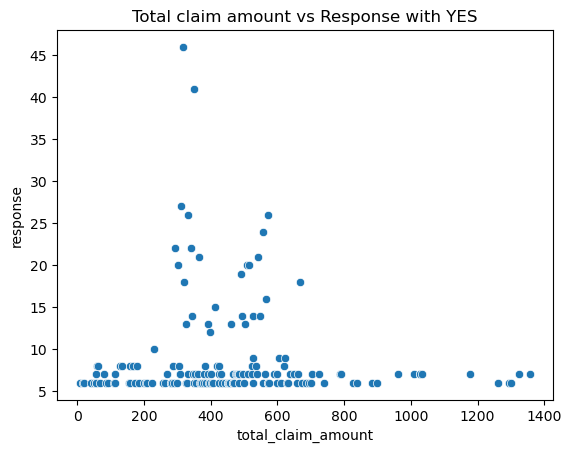

In [33]:
fig, ax = plt.subplots(1) 
sns.scatterplot(data=data_claim_response, x='total_claim_amount', y='response', ax=ax)
ax.set_title('Total claim amount vs Response with YES')
plt.show()

Show a plot of the response rate by income.

In [34]:
data_income_response = pd.pivot_table(data[data['response'] == 'Yes'], index='income', values='response', aggfunc='count').reset_index()
data_income_response.shape

(185, 2)

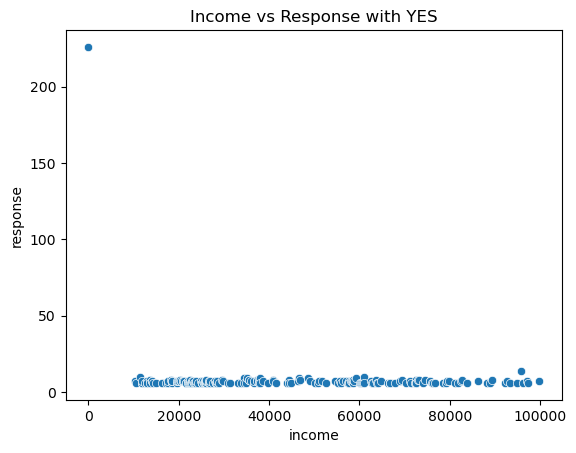

In [35]:
fig, ax = plt.subplots(1) 
sns.scatterplot(data=data_income_response, x='income', y='response', ax=ax)
ax.set_title('Income vs Response with YES')
plt.show()

In [36]:
#as i mention before the scatterplot dont looks useable because of a big group of customer without any income.
#at this point i will split the dataset into a two groups (with and without any income) to get a better insight to ralationship between response and income.
data_income_response_with_income = dc.drop_null(data_income_response,'income')

In [ ]:
fig, ax = plt.subplots(1) 
sns.scatterplot(data=data_income_response_with_income, x='income', y='response', ax=ax)
ax.set_title('Income without 0 incomes vs Response with YES')
plt.show()